### Modelo matemático de desactivación de los catalizadores. Una aproximación a la  actividad catalítica. 
#### autors: AdlS, JoMC

Formula una idea. ...  
Incluye tu punto de vista. ...  
Identifica tu público. ...  
Busca antecedentes. ...  
El principio debe ser cautivador. ...  
Incluye conclusión. ...  
Relee.  

Análisis por atomización en el tiempo del rxn

https://www.sciencedirect.com/science/article/pii/S2211339814000264?casa_token=RwCn_ezJblcAAAAA:bIDNZxM9XWuFkQZA3bhw5sefCi8OnYRzdYp-V25BHYyH8SwgeEhgZop4KAohPSwM8PZd3ro4Pw

https://www.sciencedirect.com/topics/chemical-engineering/catalyst-deactivation

#### Introducción
El objeto de estudio es la exposición de una metodología para el modelado de procesos catalíticos (desactivación y reacción), en el seno de los reactores. A lo largo del estudio iremos desarrollando los recursos analíticos con base compuntacional asociada a la evolución de la actividad catalítica. 
El camino se emprende con el desarrollo empírico de un prototipo de desactivación. Explicaremos la metodología cuya finalidad expresa con datos la exploración de la actividad catalítica en el seno de los reactores, como ya hemos comentado.  
La desactivación se hace evidente por la disminución en el tiempo de la velocidades de reacción. debiéndose esta pérdida de actividad a: deposición de coque, sinterización de las poros activos, envenenamiento e inhibición por compuestos en la carga.  
Dado que el origen de la desactivación posee varias fuentes, se considera que la ecuación cinética de desactivación queda bien representada con una relación entre la actividad y las fuentes de desactivación. Partiendo de la naturaleza poco definida de esta, sería conveniente que el modelo relacione la desactivación con las condiciones de operación, además del tiempo,  la caracterización de la carga y dimensiones del reactor, tenemos condiciones de producción como: caudales y temperaturas.  
Se propone una serie de ecuaciones cinéticas de desactivación considerando a los compuestos $C_i$ mayoritarios a la entreada del reactor, como principales precursores de la desactivación.   La expresión para reacciones de desactivación de orden $n$ tendría la forma:  
$$ \frac{da}{dt}=-r_d=  -k_d\,C_i^m a(t)^n = -k_{d_0}\, e^{\left(-\frac{E_d}{RT}\right)}C_i^m a(t)^n $$

In [1]:
from IPython.display import Math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive
from sympy import *
%matplotlib inline

Definiciones de las ecuaciones EDO para distintas reacciones de disminución de la actividad, se dispone de diferentes ecuaciones diferenciales, así como sus soluciones. A saber:
* Para desactivación independiente
$$ \frac{da}{dt}=-r_d=  -k_d\, a(t)^n = -k_{d_0}\, e^{\left(-\frac{E_d}{RT}\right)} a(t)^n $$

La ecuación que permite calcular la constante específica de velocidad $k_d$ a partir del factor de frecuencia $k_{d_0}$, la energía de activación $E_d$ y la temperatura absoluta $T$  
Donde:  
* $-\frac{E_d}{RT}$, representa la fracción de colisiones moleculares que tienen energía igual o maquor que la energía de activación. 
* $k_{d_0}$, representa la frecuencia de las colisiones entre las moléculas de reactivo

En nuestro análisis buscamos conocer a lo largo del tiempo el modelo empírico de desactivación de un reactor específico, para ello consideraremos que la temperatura utilizada en nuestro modelo propuesto corresponde a una representación de temperatura promedia de lecho por peso, conocida com temperatura WABT.

In [2]:
# análisis simbólico del modelo de desactivación independiete para una cinética de orden 1. Se definen: parámetros y funciones
R=   Symbol('R')  # 8,31·10-3 kJ·mol^-1·K
T=   Symbol('T') # K
Ed=  Symbol('E_d') # kJ·mol^-1
Cim= Symbol('C_i^m')
kd0= Symbol('k_{d_0}')  # constante de desactivación
kd=  Function('kd')
t=   Symbol('t')    # tiempos [s]
n=   Symbol('n')    # entero, expresa el orden de la reacción
a=   Function('a')
# escribimos las funciones
kd= kd0* exp(-Ed/(R*T))    
rd= kd*a(t)**n # rd define la velocidad de desactiviación
dadt=Eq(a(t).diff(t), -rd)   # escribimos la ecuación y la guardamos en 'dadt'
dadt                         # se imprime el resultado

Eq(Derivative(a(t), t), -k_{d_0}*a(t)**n*exp(-E_d/(R*T)))

In [3]:
# Resolviendo la ecuación diferencial para la desactivación independiente de orden 1
rd =  kd*a(t)**1             # rd define la velocidad de desactiviación
dadt=Eq(a(t).diff(t), -rd)   # escribimos la ecuación y la guardamos en 'dadt'
# print(latex(dadt))
a_i1= dsolve(dadt)           # contiene la solución a la función diferencial introducida
a_i1                         # se imprime el resultado

Eq(a(t), C1*exp(-k_{d_0}*t*exp(-E_d/(R*T))))

In [4]:
# Resolviendo la ecuación diferencial para la desactivación independiente de orden 2
rd =  kd*a(t)**2             # rd define la velocidad de desactiviación
dadt=Eq(a(t).diff(t), -rd)   # escribimos la ecuación y la guardamos en 'dadt'
a_i2= dsolve(dadt)           # contiene la solución a la función diferencial introducida
a_i2                         # se imprime el resultado

Eq(a(t), exp(E_d/(R*T))/(C1*exp(E_d/(R*T)) + k_{d_0}*t))


- Para desactivación paralelo
$$ \frac{da}{dt}=-r_d=  -k_d\, C_i^m\,a(t)^n = -k_{d_0}\, e^{\left(-\frac{E_d}{RT}\right)} \, C_i^m\,a(t)^n $$

In [5]:
# Resolviendo la ecuación diferencial para la desactivación en paralelo de orden 1
rd =  kd*Cim*a(t)**1       # rd define la velocidad de desactiviación
dadt=Eq(a(t).diff(t), -rd) # escribimos la ecuación y la guardamos en 'dadt'
a_p1= dsolve(dadt)           # a2 contiene la ecuacón solución a la función diferencial introducida
a_p1                         # se imprime el resultado

Eq(a(t), C1*exp(-C_i^m*k_{d_0}*t*exp(-E_d/(R*T))))

In [6]:
# Resolviendo la ecuación diferencial para la desactivación en paralelo de orden 2
rd =  kd*Cim*a(t)**2       # rd define la velocidad de desactiviación
dadt=Eq(a(t).diff(t), -rd) # escribimos la ecuación y la guardamos en 'dadt'
a_p2= dsolve(dadt)           # a2 contiene la ecuacón solución a la función diferencial introducida
a_p2                         # se imprime el resultado

Eq(a(t), exp(E_d/(R*T))/(C1*exp(E_d/(R*T)) + C_i^m*k_{d_0}*t))

#### Propuesta analítica de desactivación. Una aproximiación al comportamiento cinético en el seno de un reactor de flujo pistón (PFR) 
En un reactor de flujo pistón (PFR) en el que consideraremos:
- un gradiente de concentración en la dirección del flujo, 
- concentración radial uniforme.  
Para un volumen suficientemente pequeño la composición puede suponerse uniforme de tal modo que se verifica $ dR_{C_A}= r_{C_A}\,dV$  
El balance de materia de un reactanete A en estado estacionario y en un diferencial de volumen será:
$$\frac {\partial C_A} {\partial t} dV = Q\,C|_x - Q\,C|_{x+dx}+ r_{C_A}\, dV$$
Donde:
- $\frac {\partial C_A} {\partial t} [g/m^3 s]$, cambio en la concentración con respecto al tiempo 
- $C_A [g/m^3] $, concentración del reactio
- $dv [m^3]$, elemento diferencial de volmen
- $Q [m^3 s]$, caudal
- $r_{C_A} [g/m^3 s]$ velocidad de reacción del reactivo.  


Haciendo $dV= Adx$ y operando
$$ \frac {\partial C} {\partial t} = \frac {Q}{A}\frac {dC}{dx}+ r_{C}$$

Como hemos supuesto que el flujo se encuentra en estado estacionario $\frac {\partial C}{\partial t}= 0 $, la velocidad de reacción toma la forma: $ r_{C}= k\, C^n$  
Operando e integrando entre los límites: $C= C_{A0}, \, C= C_A\,$  y $\, x= 0, \, x= L$

$$\int_{C= C_{A0}}^{C=C_A} \frac{dC}{kC^n}= -\frac{A}{Q}\int_{x= 0}^{x= L}dx=- \frac{AL}{Q}= - \frac{V}{Q}=t_0  $$


Donde: 
- $t_0$ es el tiempo de retención hidráulico.   
La ecuación anterior es la solución del balance de masa para un reactor de flujo en pistón sin dispersión longitudinal y en el tiempo de retención hidraulica.  
Para una cinética de primer orden, la ecuación se transforma en: 
$$ C= C_2 \, e^{-kt_0}= C_2 \, e^{-k\frac{A}{Q}x|_{x= 0}^{x= L}}$$

Incorporando la desactivación independiente a la ecuación obtenida y formulándola en modo simbólico para su posterior resolución, tenemos:

In [7]:
a_i1

Eq(a(t), C1*exp(-k_{d_0}*t*exp(-E_d/(R*T))))

In [8]:
C1 = Symbol('C1')
A = Symbol('A')
Q = Symbol('Q')
k = Symbol('k')
k0 = Symbol('k_0')
kd =Symbol('k_d')
t = Symbol('t')
x = Symbol('x')
CA0 =Symbol('C_A0')
C = Function('C_A')
E = Symbol('E')
# k= k0* exp(-E/(R*T))
rc = (A/Q)*k*C(x)*C1*exp(-kd0*t*exp(-Ed/(R*T)))
dCdx=Eq(C(x).diff(x), -rc)
dCdx

Eq(Derivative(C_A(x), x), -A*C1*k*C_A(x)*exp(-k_{d_0}*t*exp(-E_d/(R*T)))/Q)

Resolviendo la ecuación diferencial

In [9]:
C= dsolve(dCdx)
C

Eq(C_A(x), C2*exp(-A*C1*k*x*exp(-k_{d_0}*t*exp(-E_d/(R*T)))/Q))

Se adjunta en modo simbólico la ecuación de conversión del reactivo o reactivos que permite a la temperatura $T$, calcular la constante específica de velocidad $k$ a partir del factor de frecuencia $A_0$ y la energía de activación $E_a$.  
Donde:  
- $-\frac{E_a}{RT}$, representa la fracción de colisiones moleculares que tienen energía igual o maquor que la energía de activación.
- $A_0$, representa la frecuencia de las colisiones entre las moléculas de reactivo

Como ya hicimos en la propuesta del modelo de desactivación, el modelo sugerido de conversión a lo largo del reactor adoptará la misma temperatura WABT que en la desactivación en el tiempo $t$, constante a lo largo del reactor.


In [10]:
A0 =Symbol('A0')
R =Symbol('R')
T =Symbol('T')
E0 =Symbol('E_0')
K= A0*exp(-E0/(R*T))
K

A0*exp(-E_0/(R*T))

Simulación del modelo. Para tal simulación podremos hacer barridos de variables como:
- $T$, Temperatura media wabt [$K$],
- $t$, tiempo [$s$],
- $k_{d_0}$ constante de desactivación,
- $C$, concentración del reactivo en la carga, 
- $L$, longitud del reactor [$m$],
- $A$, área transversar del reactor[$m^2$]

In [50]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 15 14:04:56 2018

@author: ADLS
"""
from IPython.display import Math
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive
%matplotlib inline

df= pd.DataFrame()
C= []
# modelo de la velocidad de reacción con desactivación
def modelo( C, x, kd0, t, T, A, Ed):
    A0= 1
    Q= 1
#     Ed= 1 # kJ·mol^-1
    E0= 1 # kJ·mol^-1
    R=  1
    C1= 1
#     dCdx= -(A/Q)* A0* np.exp(-E0/(R* T))* C/(C1* np.exp(-kd0* t))
    dCdx= -(A/Q)* A0* np.exp(-E0/(R* T))* C* C1* np.exp(-kd0* t* np.exp(-Ed/(R*T)))
    return dCdx

def plot(L=5, C0= 1, kd0=1e-07, t= 100, T= 300, A= 3, Ed= 100):    
    x = np.linspace(0, L, 50)
    t=t*86400
    C = odeint(modelo, C0, x, args= (kd0, t, T, A, Ed))
    print("%.2f" %(100*C[-1]), "[%]   l(rxn)[m]=  ", x[-1], "    kd0= ", kd0)
    T= 2* T
    C_doble = odeint(modelo, C0, x, args= (kd0, t, T, A, Ed))
    T= (T/2)/2
    C_mitad = odeint(modelo, C0, x, args= (kd0, t, T, A, Ed))
    # plot resultados
    T= 2* T  # kd vuelve a su valor original
    plt.plot(x, C, 'r-',  linewidth= 2, label= 'T= '+ str(T)+ ' L= '+ str(L))
    plt.plot(x, C_doble, 'b--', linewidth= 2, label= 'T= '+ str(2*T)+ ' L= '+ str(L))
    plt.plot(x, C_mitad, 'g:',  linewidth= 2, label= 'T= '+ str(T/2)+ ' L= '+ str(L))
    plt.xlabel('$dirección \, de \, flujo (x) [m]$')
    plt.ylabel('$ Concentración \, de \, reactivo $')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    df['T']= np.ravel(C)
    df.to_excel('example.xlsx', sheet_name='example')

widget = interactive(plot, C0=(0, 10, .01), L=(0, 10, .01), kd0=(0.0000001, 0.001, 0.000001),
                     t=(0.00, 400, 100.0), T=(300, 550, 10), A=(0.00, 10, 0.1),  Ed=(0.00, 100, 1),)
display(widget)

interactive(children=(FloatSlider(value=5.0, description='L', max=10.0, step=0.01), FloatSlider(value=1.0, des…

[1.40989144e+04 1.00000001e+00 1.03435557e-06]
Parámetros hallados:
C1 = 1.410e+04 ± 8.623e+02
C2 = 1.000e+00 ± 3.519e-09
kd0 = 1.034e-06 ± 6.639e-09


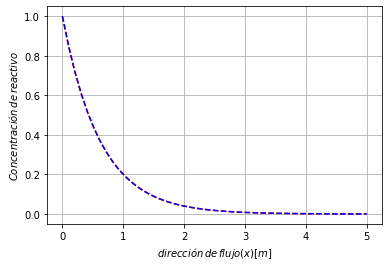

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random
import pandas as pd


df= pd.read_excel('example.xlsx', sheet_name='example', index_col=0) 
C= df['T']
def func( x, C1, C2, kd0):
    return C2*np.exp(-(A/Q)* C1* np.exp(-E0/(R* T))* x* np.exp(-kd0* t/ np.exp(-Ed/(R* T))))

x= np.linspace(0, 5, 50)
kd0= 1e-07
t= 100*86400
T= 300
A= 3
R= 8.31*10**-3 
Q= 1   
Ed= 1.597e-01 # kJ·mol^-1
E0= 1.616e+00 # kJ·mol^-1
po= []
pc= []

plt.plot(x, C, "r--")
plt.xlabel('$dirección \, de \, flujo (x) [m]$')
plt.ylabel('$ Concentración \, de \, reactivo $')
plt.grid(True)

param_ini= [0, 1, 10**-6]
popt, pcov = curve_fit(func, x, C, p0=param_ini, maxfev = 1000000)
po.append(popt)
pc.append(pcov)

plt.plot(x, func(x, *popt), 'b--')

print(popt)
# de la matriz de covarinza podemos obtener los valores de desviacion estandarde los parametros hallados
pstd = np.sqrt(np.diag(pcov))
nombres_de_param=['C1','C2','kd0']
print('Parámetros hallados:')
for i,param in enumerate(popt):
    print('{:s} = {:5.3e} ± {:5.3e}'.format( nombres_de_param[i] , param , pstd[i]/2) )


In [62]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 15 14:04:56 2018

@author: ADLS
"""
from IPython.display import Math
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive
%matplotlib inline

df= pd.DataFrame()
C= []
# modelo de la velocidad de reacción con desactivación
def modelo( C, x, kd0, t, T, A, E0):
    A0= 1
    Q= 1
    Ed= 1.597e-01 # kJ·mol^-1
#     E0= 1.616e+00 # kJ·mol^-1
    R= 1
    C1= 5.572e-01
       
    dCdx= -(A/Q)* A0* np.exp(-E0/(R* T))* C* C1* np.exp(-kd0* t* np.exp(-Ed/(R*T)))
    return dCdx

def plot(L=5,C0= 1, kd0=2.717e-03, t= 1, T= 1, A= 3, E0= 2): 
    x = np.linspace(0, L, 50)
    C = odeint(modelo, C0, x, args= (kd0, t, T, A, E0))
    print("%.2f" %(100*C[-1]), "[%]   l(rxn)[m]=  ", x[-1], "    kd0= ", kd0)
    T= 2* T
    C_doble = odeint(modelo, C0, x, args= (kd0, t, T, A, E0))
    T= (T/2)/2
    C_mitad = odeint(modelo, C0, x, args= (kd0, t, T, A, E0))
    # plot resultados
    T= 2* T  # kd vuelve a su valor original
    plt.plot(x, C, 'r-',  linewidth= 2, label= 'T= '+ str(T)+ ' L= '+ str(L))
    plt.plot(x, C_doble, 'b--', linewidth= 2, label= 'T= '+ str(2*T)+ ' L= '+ str(L))
    plt.plot(x, C_mitad, 'g:',  linewidth= 2, label= 'T= '+ str(T/2)+ ' L= '+ str(L))
    plt.xlabel('$dirección \, de \, flujo (x) [m]$')
    plt.ylabel('$ Concentración \, de \, reactivo $')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    df['T']= np.ravel(C)
    df.to_excel('example.xlsx', sheet_name='example')

widget = interactive(plot, E0=(0, 2000, 100), L=(0, 10, .01), kd0=(0.0001, 1, 0.001),
                     t=(0.00, 400, 100.0), T=(300, 550, 25), A=(0.00, 10, 0.1),)
display(widget)

interactive(children=(FloatSlider(value=5.0, description='L', max=10.0, step=0.01), IntSlider(value=1, descrip…

[ 6.50323932e+01 -6.10653616e+01  3.70406883e-06]
Parámetros hallados:
C1 = 6.503e+01 ± 7.517e+00
E0 = -6.107e+01 ± 1.031e+00
kd0 = 3.704e-06 ± 3.254e-08


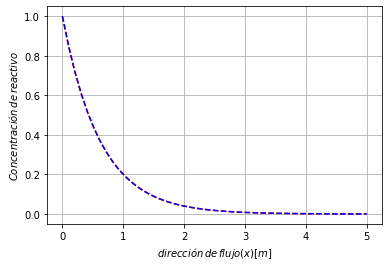

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random
import pandas as pd

# %matplotlib auto

df= pd.read_excel('example.xlsx', sheet_name='example', index_col=0) 
C= df['T']
def func( x, C1, E0, kd0):
    return C2*np.exp(-(A/Q)* C1* np.exp(-E0/(R* T))* x* np.exp(-kd0* t/ np.exp(-Ed/(R* T))))
C2= 1
x= np.linspace(0, 5, 50)
kd0= 1e-07
t= 100*86400   # s
T= 300         # K
A= 3           # m^2
R= 8.31*10**-3 # kJ·mol^-1·K
Q= 0.008       # m^3/s   
Ed= 1.597e-01  # kJ·mol^-1
# E0= 1.616e+00  # kJ·mol^-1
po= []
pc= []

plt.plot(x, C, "r--")
plt.xlabel('$dirección \, de \, flujo (x) [m]$')
plt.ylabel('$ Concentración \, de \, reactivo $')
plt.grid(True)

param_ini= [0, 1, 10**-6]
popt, pcov = curve_fit(func, x, C, p0=param_ini, maxfev = 1000000)
po.append(popt)
pc.append(pcov)

plt.plot(x, func(x, *popt), 'b--')

print(popt)
# de la matriz de covarinza podemos obtener los valores de desviacion estandarde los parametros hallados
pstd = np.sqrt(np.diag(pcov))
nombres_de_param=['C1','E0','kd0']
print('Parámetros hallados:')
for i,param in enumerate(popt):
    print('{:s} = {:5.3e} ± {:5.3e}'.format( nombres_de_param[i] , param , pstd[i]/2) )


https://marceluda.github.io/python-para-fisicos/tuto/analisis/ajuste-no-lineal/

#### Modelo matemático ajustado de la desactiviación.
Dado el modelo de desactivación catalítica de orden 'n' en función de una reacción de orden 'm', pasamos a deducir del modelo matemático los valores de los parámetros, estos deben ser los mas fieles a los datos obtenidos desde el proceso. El método mas común para construir una correspondencia entre los datos reales y los matemáticos es utilizando el método de mínimos cuadrados.
Partimos con los datos del proceso. Estos se definen en series temporales y en forma vectorial, a saber:  
- Concentración en el eflueente del reactivo [$mol/m^3$].
- tiempo [$s$].
- Temperatura media en el Rx [$K$].
- Concentración en la entrada del Rx del reactivo  [$mol/m^3$].
- ...

Definida la función modelo que creemos describe el fenómeno medido. Esta, tiene como argumento de entrada los valores de t y como salida una predicción para valores de C. A su vez, depende de parámetros. como:
- $C_1$, constante obtenida a partir de la resolución de la ecuación diferencial en $t$ (vida del catalizador).
- $C_2$, constante obtenida a partir de la resolución de la ecuación diferencial en $x$ (trayectorial de la reacción)
- $k_d$, esta es la constante de desactivación.
$$f_{C_1, C_2, k_d}(t)|_T= C_2 e^{-\left(\frac {A\,e^{\left(\frac{-E_0}{R\,T}\right)}\,x\,C_1\,e^{\left(-k_d\,t\right)}}{Q}\right)}$$
##### Ajuste del modelo utilizando la funicón cuver_fit
Para el ajuste con la función curve_fit se requiere definir la variable independiente, en nuestro caso 't'. Se incluye una segunda variable que indicará los valores que debe alcanzar la respuesta en función de la variable t ya introducida, para ello la función de ajuste manipulará un conjunto de parámetros, indicando previamente los valores iniciales para los parámetros como punto de partida del algoritmo de ajuste.


Es importante conocer un estimador que nos indique, evaluando el modelo, con que grado el modelo se aproxima a los datos del proceso, para ello describimos un coeficiente de determinación $R^2$, el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será.


##### Coeficiente de determinación. $R^2$
$$ R^2= \frac{\sum_{t=1}^{t= n} \left({Y_t} -\hat{Y} \right)^2}{\sum_{t=1}^{t= n} \left({Y_t} -\vec{Y} \right)^2}   $$

In [13]:
print('Coeficiente de determinacion R2 y parámetros optimizados:')
# Suma de los cuadrados de los residuos
ss_res = np.sum( (C - func(t, *popt))**2 )

# Suma total de cuadrados
ss_tot = np.sum( (C - np.mean(C) )**2  )

R2     =1- (ss_res / ss_tot)
print('R2 = {:5.3f}'.format(R2), " param._opt.:", popt )

Coeficiente de determinacion R2 y parámetros optimizados:
R2 = 0.999  param._opt.: [1.00646417e-02 9.25613092e-01 1.15824149e-08]


Text(0.5, 0, 'dias')

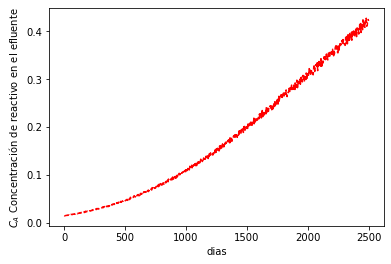

In [14]:
# Carga de datos, concentración del reactivo en el efluente
archivo= 'example.xlsx'
hoja= 'example'

df = pd.read_excel(archivo, sheet_name=hoja, index_col=0)
C= df['T']
T= np.linspace(300, 500, 50)
plt.plot(td, C, "r--")
plt.ylabel('$C_A$ Concentración de reactivo en el efluente')
plt.xlabel('dias')


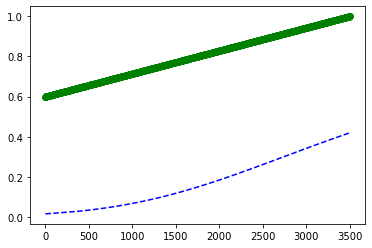

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random
import pandas as pd

df= pd.DataFrame()



def func( t, C1, C2, k_d): 
    return C2*np.exp(-A/Q *k* L*C1* np.exp(-k_d* t))

A= 1 # radio de 1.6 metros
E= 1
R= E/450
Q= random.uniform(0.00795, 0.00805)  #m3/s
L= 5

k_d= 1/(86400*1000)
T= np.linspace(300, 500, 935)
t= np.linspace(0, 3500*86400, 935)
k= 1* np.exp(-E/(R*T))

archivo= 'example.xlsx'
hoja= 'example'

df = pd.read_excel(archivo, sheet_name=hoja, index_col=0)
C= df['T']

td= (t/86400).astype(int)
param_ini= [0, 1, 0]
popt, pcov = curve_fit(func, t, C, p0=param_ini)

plt.plot(td, T/500, 'go')
plt.plot(td, func(t, *popt), 'b--')

https://sites.google.com/site/bioingenieriauv15/unidad-2-biorreactores-y-su-aplicacion/2-3-reactor-de-flujo-piston  
https://www.youtube.com/watch?v=lG3EO6SzqcM  
http://oa.upm.es/42867/1/TFG_GUILLERMO_NIEVA_GARCIA_VILLARACO.pdf   punto 3.1 ecuaciones de modelo pag 40

https://apmonitor.com/pdc/index.php/Main/PhysicsBasedModels
https://jckantor.github.io/CBE30338/   libro muy interesante

https://sites.google.com/site/bioingenieriauv15/unidad-2-biorreactores-y-su-aplicacion/2-3-reactor-de-flujo-piston balance de masa, ver última ecuación  


##### Desactivación de los catalizadores
Las transformaciones físico químicas que se suceden en el seno de un reactor 'rxn' tiene como efecto alteraciones en la actividad del catalizador. En el documento analizaremos tres modelos (las tres E) de desactivación, a saber:
- Envejecimiento, es una degradacón térmica, sinterización de las áreas activas del catalizador  (sintering)
- Ensuciamiento, son deposiciones física de la carga líquida sobre la superficie del catalizador (fouling)
- Envenenamiento, se debe a la quimiadsorción de los centros activos, generalmente por impurezas (poisoning)

##### Modelo de desactivación por envejecimiento  
La pérdida de actividad por envejecimiento es un proceso reactivo en el que la estructura del catalizador se degrada, pudidendo ser:
* reducción de a superficie específica
* limitación u obstrucción de los poros
* alteración en la constitución de las zonas activas.
El envejeciminto se ve potenciado por la temperatura y con poca frecuencia depende de los reactivos. Para su modelado se asume una cinética configurable, dejando al ingeniero el ajuste.  
La velocidad de desactivación por envejecimiento para una cinética de orden $2$ con respecto a la actividad:  
$$ r_d= -\frac{da}{dt}= k_d a(t)^2$$ 
donde:
    - $k_d$ constante de desactivación  
para la cinética definida la actividad catalítica en el tiempo será:
$ a(t)= \frac{1}{1+k_d\, t}$

##### Modelo de desactivación por ensuciamiento  
La degradación por coque es la causa fundamental de la desactivación por ensuciamiento de los catalizadores,  fundamentalmente en la industria química y petroquímica. El coque es un combustible con pocas impurezas y un alto contenido de carbono, el contenido carbonoso es adsorbido por la superficie catalítica, bloqueando: parte de los centros activos o los poros de acceso al centro activo, impidiendo a los reactivos el paso hacia los centros activos.

La actividad catalítica en un rxn determina su desactivación, analíticamente se expresa como: $$ a= \frac{velocidad\,de\,reacción\,en\,t_i}{velocidad\,de\,reacción\,en\,t_0}= \frac {-r_A|_{t_i}}{(-r_A)|_{t_0}}$$
- La velocidad de reacción en $t_0$ del reactivo A será:  $$ -r_A|{t_0}= k(T)\, f_n(C_A, C_B, . . .,  C_Y, C_Z,..., C\gamma)$$
- y para $t_i$ tenemos: $$ -r_A|{t_i}= a(t)\, k(T)\, f_n(C_A, C_B, . . .,  C_Y, C_Z,..., C\gamma)$$
- Donde:  
  $a(t)$.- especifica la actividad catalítica en función del tiempo  
  $k(T)$.- constante cinética en función de la temperatura  
  $C_i$.- concentración de: $\;reactivos:\,  C_A, C_B...\;\;productos:\,...,C_Y,C_Z,\;\; impurezas:\, ...C\gamma$

Para una cinética de orden $n$ y un modelo de dependencia de la temperatura tipo Arrhenius, la velocidad de reacción de un reactivo será: $$ -r_A|_{t_i}= K e^{-\frac{E}{RT}}\,C_A^n\,a(t) $$  
La velocidad de desactivación de un catalizador $r_d$, se define como la variación de la actividad con el tiempo, en función de la temperatura, de la caracterización de la corriente gaseosa y de la propia actividad $$r_d= -\frac{da}{dt}= g(a)\, k_d(T)\, f(C_A, C_B, . . .,  C_Y, C_Z,..., C\gamma)= k_d C_i^m a^p= k_{d0}\,e^{-\frac{E_{d}}{RT}}C_i^m a^p$$
Donde:
- $k_d$ constante de desactivación
- $k_{d0}$ constante de desactivación inicial
- $a$ actividad del catalizador  
    Para algunos autores $a= \frac{d}{d_0}$, siendo d la dispersión del metal
- $p$ se denonima orden de dasactivación, 
- $m$ mide la dependencia de la concentración,
- $E_{Ad}$ es la energía de activación para la reacción de desactivación con la temperatura
    

#### Reacciones  
En general la rapidez de las reacciones químicas de una sustancia o la velociadad a la que se descompone las moléculas es proporcional a la cantidad de dicha sustancia. De este modo siendo $C(t)$ la cantidad de una determinada molécula o sustancia en el tiempo $t$, analíticamente se escribe como $\frac{dC}{dt}= k dC$, donde:  
$k$, es una constante que depende la $C$.  
En nuestro análisis empleraciones modelos de este tipo, llamados de primer orden.